In [1]:
import numpy as np
from tqdm import tqdm
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K 
import math

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

In [3]:
csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:26<00:00, 1363.28it/s]

train : 32298, eval :3589


Angry


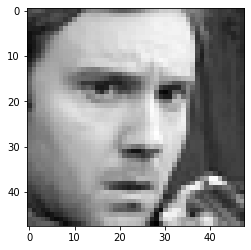

In [4]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best.h5', monitor='val_categorical_accuracy', verbose=1, mode='auto', save_best_only=True)

In [6]:
# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
hist = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=550,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)),
         callbacks=[mc])

Epoch 1/550
64/64 [==============================] - ETA: 0s - loss: 1.8318 - categorical_accuracy: 0.2456
Epoch 00001: val_categorical_accuracy improved from -inf to 0.14712, saving model to best.h5
64/64 [==============================] - 72s 1s/step - loss: 1.8318 - categorical_accuracy: 0.2456 - val_loss: 1.9388 - val_categorical_accuracy: 0.1471
Epoch 2/550
63/64 [============================>.] - ETA: 0s - loss: 1.6996 - categorical_accuracy: 0.3102
Epoch 00002: val_categorical_accuracy improved from 0.14712 to 0.24492, saving model to best.h5
64/64 [==============================] - 6s 97ms/step - loss: 1.6995 - categorical_accuracy: 0.3103 - val_loss: 1.9279 - val_categorical_accuracy: 0.2449
Epoch 3/550
63/64 [============================>.] - ETA: 0s - loss: 1.6018 - categorical_accuracy: 0.3715
Epoch 00003: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 93ms/step - loss: 1.6015 - categorical_accuracy: 0.3717 - val_loss: 1.92

Epoch 26/550
63/64 [============================>.] - ETA: 0s - loss: 0.3633 - categorical_accuracy: 0.8707
Epoch 00026: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 94ms/step - loss: 0.3639 - categorical_accuracy: 0.8705 - val_loss: 1.9747 - val_categorical_accuracy: 0.1655
Epoch 27/550
63/64 [============================>.] - ETA: 0s - loss: 0.4185 - categorical_accuracy: 0.8499
Epoch 00027: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 94ms/step - loss: 0.4191 - categorical_accuracy: 0.8498 - val_loss: 1.9758 - val_categorical_accuracy: 0.1655
Epoch 28/550
63/64 [============================>.] - ETA: 0s - loss: 0.3947 - categorical_accuracy: 0.8596
Epoch 00028: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 92ms/step - loss: 0.3947 - categorical_accuracy: 0.8596 - val_loss: 2.0052 - val_categorical_accuracy: 0.1655
Epoch 29/550


Epoch 51/550
63/64 [============================>.] - ETA: 0s - loss: 0.1667 - categorical_accuracy: 0.9441
Epoch 00051: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 96ms/step - loss: 0.1671 - categorical_accuracy: 0.9439 - val_loss: 2.1773 - val_categorical_accuracy: 0.1655
Epoch 52/550
63/64 [============================>.] - ETA: 0s - loss: 0.1640 - categorical_accuracy: 0.9425
Epoch 00052: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 93ms/step - loss: 0.1646 - categorical_accuracy: 0.9423 - val_loss: 2.2568 - val_categorical_accuracy: 0.1655
Epoch 53/550
63/64 [============================>.] - ETA: 0s - loss: 0.2283 - categorical_accuracy: 0.9200
Epoch 00053: val_categorical_accuracy did not improve from 0.24492
64/64 [==============================] - 6s 92ms/step - loss: 0.2282 - categorical_accuracy: 0.9200 - val_loss: 2.2492 - val_categorical_accuracy: 0.1655
Epoch 54/550


Epoch 76/550
63/64 [============================>.] - ETA: 0s - loss: 0.1394 - categorical_accuracy: 0.9520
Epoch 00076: val_categorical_accuracy improved from 0.32293 to 0.33603, saving model to best.h5
64/64 [==============================] - 6s 96ms/step - loss: 0.1393 - categorical_accuracy: 0.9521 - val_loss: 2.9495 - val_categorical_accuracy: 0.3360
Epoch 77/550
63/64 [============================>.] - ETA: 0s - loss: 0.0692 - categorical_accuracy: 0.9773
Epoch 00077: val_categorical_accuracy improved from 0.33603 to 0.33742, saving model to best.h5
64/64 [==============================] - 6s 97ms/step - loss: 0.0701 - categorical_accuracy: 0.9771 - val_loss: 3.1223 - val_categorical_accuracy: 0.3374
Epoch 78/550
63/64 [============================>.] - ETA: 0s - loss: 0.2055 - categorical_accuracy: 0.9306
Epoch 00078: val_categorical_accuracy improved from 0.33742 to 0.36222, saving model to best.h5
64/64 [==============================] - 6s 95ms/step - loss: 0.2063 - categoric

Epoch 100/550
63/64 [============================>.] - ETA: 0s - loss: 0.1664 - categorical_accuracy: 0.9425
Epoch 00100: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.1665 - categorical_accuracy: 0.9425 - val_loss: 5.1969 - val_categorical_accuracy: 0.3984
Epoch 101/550
63/64 [============================>.] - ETA: 0s - loss: 0.0778 - categorical_accuracy: 0.9728
Epoch 00101: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0778 - categorical_accuracy: 0.9728 - val_loss: 5.6342 - val_categorical_accuracy: 0.4054
Epoch 102/550
63/64 [============================>.] - ETA: 0s - loss: 0.0540 - categorical_accuracy: 0.9823
Epoch 00102: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0542 - categorical_accuracy: 0.9822 - val_loss: 4.9193 - val_categorical_accuracy: 0.4238
Epoch 103/

Epoch 125/550
63/64 [============================>.] - ETA: 0s - loss: 0.1211 - categorical_accuracy: 0.9581
Epoch 00125: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 93ms/step - loss: 0.1212 - categorical_accuracy: 0.9580 - val_loss: 5.9051 - val_categorical_accuracy: 0.3636
Epoch 126/550
63/64 [============================>.] - ETA: 0s - loss: 0.0893 - categorical_accuracy: 0.9694
Epoch 00126: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 93ms/step - loss: 0.0895 - categorical_accuracy: 0.9693 - val_loss: 5.7330 - val_categorical_accuracy: 0.3424
Epoch 127/550
63/64 [============================>.] - ETA: 0s - loss: 0.1110 - categorical_accuracy: 0.9609
Epoch 00127: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 93ms/step - loss: 0.1112 - categorical_accuracy: 0.9608 - val_loss: 5.6931 - val_categorical_accuracy: 0.3982
Epoch 128/

Epoch 150/550
63/64 [============================>.] - ETA: 0s - loss: 0.0784 - categorical_accuracy: 0.9726
Epoch 00150: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 92ms/step - loss: 0.0783 - categorical_accuracy: 0.9726 - val_loss: 5.4787 - val_categorical_accuracy: 0.3962
Epoch 151/550
63/64 [============================>.] - ETA: 0s - loss: 0.0353 - categorical_accuracy: 0.9874
Epoch 00151: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 93ms/step - loss: 0.0359 - categorical_accuracy: 0.9872 - val_loss: 5.1752 - val_categorical_accuracy: 0.3892
Epoch 152/550
63/64 [============================>.] - ETA: 0s - loss: 0.1419 - categorical_accuracy: 0.9516
Epoch 00152: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 92ms/step - loss: 0.1419 - categorical_accuracy: 0.9516 - val_loss: 5.5843 - val_categorical_accuracy: 0.3859
Epoch 153/

Epoch 175/550
63/64 [============================>.] - ETA: 0s - loss: 0.0308 - categorical_accuracy: 0.9889
Epoch 00175: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0308 - categorical_accuracy: 0.9889 - val_loss: 5.4647 - val_categorical_accuracy: 0.3778
Epoch 176/550
63/64 [============================>.] - ETA: 0s - loss: 0.0574 - categorical_accuracy: 0.9796
Epoch 00176: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0574 - categorical_accuracy: 0.9796 - val_loss: 5.3921 - val_categorical_accuracy: 0.4048
Epoch 177/550
63/64 [============================>.] - ETA: 0s - loss: 0.0457 - categorical_accuracy: 0.9834
Epoch 00177: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 90ms/step - loss: 0.0457 - categorical_accuracy: 0.9835 - val_loss: 5.3698 - val_categorical_accuracy: 0.4124
Epoch 178/

Epoch 200/550
63/64 [============================>.] - ETA: 0s - loss: 0.0419 - categorical_accuracy: 0.9848
Epoch 00200: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0420 - categorical_accuracy: 0.9848 - val_loss: 5.2903 - val_categorical_accuracy: 0.4051
Epoch 201/550
63/64 [============================>.] - ETA: 0s - loss: 0.0849 - categorical_accuracy: 0.9710
Epoch 00201: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0854 - categorical_accuracy: 0.9709 - val_loss: 5.1687 - val_categorical_accuracy: 0.3689
Epoch 202/550
63/64 [============================>.] - ETA: 0s - loss: 0.1204 - categorical_accuracy: 0.9590
Epoch 00202: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.1204 - categorical_accuracy: 0.9590 - val_loss: 5.3998 - val_categorical_accuracy: 0.4149
Epoch 203/

Epoch 225/550
63/64 [============================>.] - ETA: 0s - loss: 0.0171 - categorical_accuracy: 0.9935
Epoch 00225: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0174 - categorical_accuracy: 0.9934 - val_loss: 5.0818 - val_categorical_accuracy: 0.4101
Epoch 226/550
63/64 [============================>.] - ETA: 0s - loss: 0.1201 - categorical_accuracy: 0.9599
Epoch 00226: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 92ms/step - loss: 0.1205 - categorical_accuracy: 0.9597 - val_loss: 4.8909 - val_categorical_accuracy: 0.4149
Epoch 227/550
63/64 [============================>.] - ETA: 0s - loss: 0.0828 - categorical_accuracy: 0.9713
Epoch 00227: val_categorical_accuracy did not improve from 0.42909
64/64 [==============================] - 6s 91ms/step - loss: 0.0831 - categorical_accuracy: 0.9712 - val_loss: 4.9524 - val_categorical_accuracy: 0.3957
Epoch 228/

Epoch 250/550
63/64 [============================>.] - ETA: 0s - loss: 0.0217 - categorical_accuracy: 0.9921
Epoch 00250: val_categorical_accuracy improved from 0.44023 to 0.44497, saving model to best.h5
64/64 [==============================] - 6s 96ms/step - loss: 0.0218 - categorical_accuracy: 0.9921 - val_loss: 5.0494 - val_categorical_accuracy: 0.4450
Epoch 251/550
63/64 [============================>.] - ETA: 0s - loss: 0.0467 - categorical_accuracy: 0.9840
Epoch 00251: val_categorical_accuracy did not improve from 0.44497
64/64 [==============================] - 6s 93ms/step - loss: 0.0467 - categorical_accuracy: 0.9840 - val_loss: 4.9586 - val_categorical_accuracy: 0.4283
Epoch 252/550
63/64 [============================>.] - ETA: 0s - loss: 0.0317 - categorical_accuracy: 0.9877
Epoch 00252: val_categorical_accuracy did not improve from 0.44497
64/64 [==============================] - 6s 93ms/step - loss: 0.0317 - categorical_accuracy: 0.9877 - val_loss: 4.9035 - val_categorica

Epoch 275/550
63/64 [============================>.] - ETA: 0s - loss: 0.1257 - categorical_accuracy: 0.9598
Epoch 00275: val_categorical_accuracy did not improve from 0.44497
64/64 [==============================] - 6s 92ms/step - loss: 0.1258 - categorical_accuracy: 0.9597 - val_loss: 4.8394 - val_categorical_accuracy: 0.4246
Epoch 276/550
63/64 [============================>.] - ETA: 0s - loss: 0.0638 - categorical_accuracy: 0.9774
Epoch 00276: val_categorical_accuracy did not improve from 0.44497
64/64 [==============================] - 6s 91ms/step - loss: 0.0638 - categorical_accuracy: 0.9774 - val_loss: 4.7361 - val_categorical_accuracy: 0.4255
Epoch 277/550
63/64 [============================>.] - ETA: 0s - loss: 0.0292 - categorical_accuracy: 0.9897
Epoch 00277: val_categorical_accuracy did not improve from 0.44497
64/64 [==============================] - 6s 91ms/step - loss: 0.0293 - categorical_accuracy: 0.9897 - val_loss: 4.7850 - val_categorical_accuracy: 0.4249
Epoch 278/

Epoch 300/550
63/64 [============================>.] - ETA: 0s - loss: 0.0556 - categorical_accuracy: 0.9807
Epoch 00300: val_categorical_accuracy did not improve from 0.44776
64/64 [==============================] - 6s 96ms/step - loss: 0.0556 - categorical_accuracy: 0.9807 - val_loss: 4.5213 - val_categorical_accuracy: 0.4263
Epoch 301/550
63/64 [============================>.] - ETA: 0s - loss: 0.0242 - categorical_accuracy: 0.9913
Epoch 00301: val_categorical_accuracy did not improve from 0.44776
64/64 [==============================] - 6s 97ms/step - loss: 0.0243 - categorical_accuracy: 0.9912 - val_loss: 4.6230 - val_categorical_accuracy: 0.4324
Epoch 302/550
63/64 [============================>.] - ETA: 0s - loss: 0.0523 - categorical_accuracy: 0.9827
Epoch 00302: val_categorical_accuracy did not improve from 0.44776
64/64 [==============================] - 6s 96ms/step - loss: 0.0524 - categorical_accuracy: 0.9827 - val_loss: 4.6811 - val_categorical_accuracy: 0.4283
Epoch 303/

Epoch 325/550
63/64 [============================>.] - ETA: 0s - loss: 0.0244 - categorical_accuracy: 0.9908
Epoch 00325: val_categorical_accuracy improved from 0.45584 to 0.45946, saving model to best.h5
64/64 [==============================] - 7s 103ms/step - loss: 0.0246 - categorical_accuracy: 0.9907 - val_loss: 4.7838 - val_categorical_accuracy: 0.4595
Epoch 326/550
63/64 [============================>.] - ETA: 0s - loss: 0.0565 - categorical_accuracy: 0.9805
Epoch 00326: val_categorical_accuracy did not improve from 0.45946
64/64 [==============================] - 6s 97ms/step - loss: 0.0565 - categorical_accuracy: 0.9805 - val_loss: 4.9032 - val_categorical_accuracy: 0.4308
Epoch 327/550
63/64 [============================>.] - ETA: 0s - loss: 0.0435 - categorical_accuracy: 0.9843
Epoch 00327: val_categorical_accuracy did not improve from 0.45946
64/64 [==============================] - 6s 98ms/step - loss: 0.0437 - categorical_accuracy: 0.9842 - val_loss: 5.2242 - val_categoric

Epoch 350/550
63/64 [============================>.] - ETA: 0s - loss: 0.0257 - categorical_accuracy: 0.9912
Epoch 00350: val_categorical_accuracy did not improve from 0.46392
64/64 [==============================] - 6s 98ms/step - loss: 0.0257 - categorical_accuracy: 0.9912 - val_loss: 4.7745 - val_categorical_accuracy: 0.4528
Epoch 351/550
63/64 [============================>.] - ETA: 0s - loss: 0.0094 - categorical_accuracy: 0.9964
Epoch 00351: val_categorical_accuracy improved from 0.46392 to 0.46754, saving model to best.h5
64/64 [==============================] - 7s 103ms/step - loss: 0.0095 - categorical_accuracy: 0.9964 - val_loss: 4.8589 - val_categorical_accuracy: 0.4675
Epoch 352/550
63/64 [============================>.] - ETA: 0s - loss: 0.0225 - categorical_accuracy: 0.9921
Epoch 00352: val_categorical_accuracy did not improve from 0.46754
64/64 [==============================] - 6s 96ms/step - loss: 0.0225 - categorical_accuracy: 0.9921 - val_loss: 4.8844 - val_categoric

Epoch 375/550
63/64 [============================>.] - ETA: 0s - loss: 0.0120 - categorical_accuracy: 0.9951
Epoch 00375: val_categorical_accuracy did not improve from 0.46865
64/64 [==============================] - 6s 97ms/step - loss: 0.0120 - categorical_accuracy: 0.9951 - val_loss: 4.9230 - val_categorical_accuracy: 0.4327
Epoch 376/550
63/64 [============================>.] - ETA: 0s - loss: 0.0171 - categorical_accuracy: 0.9936
Epoch 00376: val_categorical_accuracy did not improve from 0.46865
64/64 [==============================] - 6s 97ms/step - loss: 0.0171 - categorical_accuracy: 0.9936 - val_loss: 4.9679 - val_categorical_accuracy: 0.4511
Epoch 377/550
63/64 [============================>.] - ETA: 0s - loss: 0.0350 - categorical_accuracy: 0.9876
Epoch 00377: val_categorical_accuracy did not improve from 0.46865
64/64 [==============================] - 6s 97ms/step - loss: 0.0352 - categorical_accuracy: 0.9875 - val_loss: 4.9760 - val_categorical_accuracy: 0.4544
Epoch 378/

Epoch 400/550
63/64 [============================>.] - ETA: 0s - loss: 0.0186 - categorical_accuracy: 0.9929
Epoch 00400: val_categorical_accuracy did not improve from 0.47506
64/64 [==============================] - 7s 102ms/step - loss: 0.0186 - categorical_accuracy: 0.9929 - val_loss: 4.9067 - val_categorical_accuracy: 0.4500
Epoch 401/550
63/64 [============================>.] - ETA: 0s - loss: 0.0385 - categorical_accuracy: 0.9861
Epoch 00401: val_categorical_accuracy improved from 0.47506 to 0.47534, saving model to best.h5
64/64 [==============================] - 7s 107ms/step - loss: 0.0384 - categorical_accuracy: 0.9862 - val_loss: 4.6272 - val_categorical_accuracy: 0.4753
Epoch 402/550
63/64 [============================>.] - ETA: 0s - loss: 0.0223 - categorical_accuracy: 0.9913 ETA: 1s - loss: 0.0227 - cate
Epoch 00402: val_categorical_accuracy did not improve from 0.47534
64/64 [==============================] - 6s 101ms/step - loss: 0.0224 - categorical_accuracy: 0.9912 - 

Epoch 425/550
63/64 [============================>.] - ETA: 0s - loss: 0.0508 - categorical_accuracy: 0.9828
Epoch 00425: val_categorical_accuracy did not improve from 0.47534
64/64 [==============================] - 6s 92ms/step - loss: 0.0510 - categorical_accuracy: 0.9827 - val_loss: 4.7341 - val_categorical_accuracy: 0.4539
Epoch 426/550
63/64 [============================>.] - ETA: 0s - loss: 0.0554 - categorical_accuracy: 0.9809
Epoch 00426: val_categorical_accuracy did not improve from 0.47534
64/64 [==============================] - 6s 92ms/step - loss: 0.0554 - categorical_accuracy: 0.9809 - val_loss: 4.6142 - val_categorical_accuracy: 0.4609
Epoch 427/550
63/64 [============================>.] - ETA: 0s - loss: 0.0177 - categorical_accuracy: 0.9937
Epoch 00427: val_categorical_accuracy did not improve from 0.47534
64/64 [==============================] - 6s 92ms/step - loss: 0.0177 - categorical_accuracy: 0.9937 - val_loss: 4.6514 - val_categorical_accuracy: 0.4586
Epoch 428/

Epoch 450/550
63/64 [============================>.] - ETA: 0s - loss: 0.0177 - categorical_accuracy: 0.9932
Epoch 00450: val_categorical_accuracy did not improve from 0.47980
64/64 [==============================] - 6s 92ms/step - loss: 0.0177 - categorical_accuracy: 0.9932 - val_loss: 4.4677 - val_categorical_accuracy: 0.4753
Epoch 451/550
63/64 [============================>.] - ETA: 0s - loss: 0.0307 - categorical_accuracy: 0.9890
Epoch 00451: val_categorical_accuracy did not improve from 0.47980
64/64 [==============================] - 6s 92ms/step - loss: 0.0308 - categorical_accuracy: 0.9890 - val_loss: 4.4623 - val_categorical_accuracy: 0.4544
Epoch 452/550
63/64 [============================>.] - ETA: 0s - loss: 0.0443 - categorical_accuracy: 0.9842
Epoch 00452: val_categorical_accuracy did not improve from 0.47980
64/64 [==============================] - 6s 92ms/step - loss: 0.0444 - categorical_accuracy: 0.9841 - val_loss: 4.8262 - val_categorical_accuracy: 0.4611
Epoch 453/

Epoch 475/550
63/64 [============================>.] - ETA: 0s - loss: 0.0102 - categorical_accuracy: 0.9959
Epoch 00475: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 92ms/step - loss: 0.0102 - categorical_accuracy: 0.9959 - val_loss: 4.6695 - val_categorical_accuracy: 0.4778
Epoch 476/550
63/64 [============================>.] - ETA: 0s - loss: 0.0105 - categorical_accuracy: 0.9959
Epoch 00476: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 91ms/step - loss: 0.0105 - categorical_accuracy: 0.9959 - val_loss: 4.8304 - val_categorical_accuracy: 0.4717
Epoch 477/550
63/64 [============================>.] - ETA: 0s - loss: 0.0168 - categorical_accuracy: 0.9939
Epoch 00477: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 91ms/step - loss: 0.0172 - categorical_accuracy: 0.9938 - val_loss: 4.7540 - val_categorical_accuracy: 0.4681
Epoch 478/

Epoch 500/550
63/64 [============================>.] - ETA: 0s - loss: 0.0058 - categorical_accuracy: 0.9972
Epoch 00500: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 91ms/step - loss: 0.0060 - categorical_accuracy: 0.9972 - val_loss: 4.8986 - val_categorical_accuracy: 0.4720
Epoch 501/550
63/64 [============================>.] - ETA: 0s - loss: 0.0517 - categorical_accuracy: 0.9820
Epoch 00501: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 92ms/step - loss: 0.0520 - categorical_accuracy: 0.9819 - val_loss: 5.1441 - val_categorical_accuracy: 0.4341
Epoch 502/550
63/64 [============================>.] - ETA: 0s - loss: 0.0644 - categorical_accuracy: 0.9781
Epoch 00502: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 95ms/step - loss: 0.0643 - categorical_accuracy: 0.9781 - val_loss: 4.8155 - val_categorical_accuracy: 0.4553
Epoch 503/

Epoch 525/550
63/64 [============================>.] - ETA: 0s - loss: 0.0138 - categorical_accuracy: 0.9946
Epoch 00525: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 91ms/step - loss: 0.0138 - categorical_accuracy: 0.9946 - val_loss: 4.6840 - val_categorical_accuracy: 0.4726
Epoch 526/550
63/64 [============================>.] - ETA: 0s - loss: 0.0157 - categorical_accuracy: 0.9943
Epoch 00526: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 92ms/step - loss: 0.0157 - categorical_accuracy: 0.9943 - val_loss: 4.7753 - val_categorical_accuracy: 0.4748
Epoch 527/550
63/64 [============================>.] - ETA: 0s - loss: 0.0090 - categorical_accuracy: 0.9961
Epoch 00527: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 91ms/step - loss: 0.0093 - categorical_accuracy: 0.9960 - val_loss: 4.9019 - val_categorical_accuracy: 0.4703
Epoch 528/

Epoch 550/550
63/64 [============================>.] - ETA: 0s - loss: 0.0135 - categorical_accuracy: 0.9946
Epoch 00550: val_categorical_accuracy did not improve from 0.48259
64/64 [==============================] - 6s 92ms/step - loss: 0.0135 - categorical_accuracy: 0.9946 - val_loss: 4.7935 - val_categorical_accuracy: 0.4687


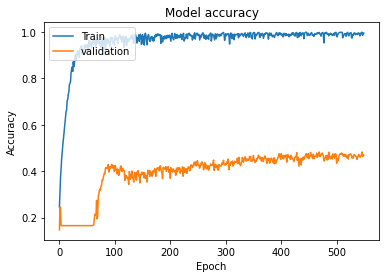

In [7]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

In [8]:
import os
os.path.exists('best.h5')

True